In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from openmoltools import openeye
import openeye.oechem as oechem
import openeye.oemedchem as oemedchem
import openeye.oedepict as oedepict
from torsionfit.qmscan.enumfrags2pdf import main as vis_wrapper
import glob
from os.path import isfile, join
import numpy as np
from torsionfit.qmscan.enumfrags2pdf import *
from torsionfit.qmscan import torsion_scan
import os
from fnmatch import fnmatch
from torsionfit.database.qmdatabase import parse_psi4_out

In [21]:
f = open('4phepyr.smi', 'r')

In [22]:
smiles = {}
for line in f:    
    smile, name = line.rstrip().split(' ')
    smiles[name] = smile
f.close()

In [102]:
for smile in smiles:
    mol = openeye.smiles_to_oemol(smiles[smile])
    print(smile)
    print(mol.GetMCMolTitle())
    #mol.name
    oedepict.OEPrepareDepiction(mol)
    oedepict.OERenderMolecule("{}.png".format(smile), mol)
    

4phepyr
4-phenylpyridine
4phepyrOH_neutral
4-(4-pyridyl)phenol
4phepyrOH_anion
4-(4-pyridyl)phenolate
4phepyrOH_cation
4-pyridin-1-ium-4-ylphenol
4phepyrOH_zwitterion
4-pyridin-1-ium-4-ylphenolate
4phepyrF
4-(2-fluorophenyl)pyridine
4phepyrFOH_neutral
3-fluoro-4-(4-pyridyl)phenol
4phepyrFOH_anion
3-fluoro-4-(4-pyridyl)phenolate
4phepyrFOH_cation
3-fluoro-4-pyridin-1-ium-4-yl-phenol
4phepyrFOH_zwitterion
3-fluoro-4-pyridin-1-ium-4-yl-phenolate


In [93]:
ifs = oechem.oemolistream()
ifs.open('4phepyr.oeb')
ofs = oechem.oemolostream()
for mol in ifs.GetOEGraphMols():
    charge = 0
    title = mol.GetTitle()[1:]
    smiles = oechem.OEMolToSmiles(mol)
    charge += smiles.count('+')
    charge -= smiles.count('-')  
    fname = "{}.mol2".format(title)
    ofs.open(fname)
    oechem.OEWriteMolecule(ofs, mol)
    path = os.path.join(os.getcwd(), title)    
    # Generate scan input files
    torsion_scan.generate_torsions(fname, path, 15)
    for folder in os.listdir(path):
        path_new = os.path.join(path, folder)
        torsion_scan.generate_scan_input(root=path_new, filetype='pdb', mol_name=title, method=['MP2'], 
                             basis_set=['aug-cc-PVTZ'], symmetry='C1', charge=charge, mem='5 Gb')
        
ifs.close()

18:05:09 INFO torsionFit: Idxs: 3 9 10 5
18:05:09 INFO torsionFit: Atom Numbers: 6 6 6 6
18:05:09 INFO torsionFit: new_tor with central bond across atoms: 9 10
18:05:09 INFO torsionFit: Idxs: 3 9 10 6
18:05:09 INFO torsionFit: Atom Numbers: 6 6 6 6
18:05:09 INFO torsionFit: Not a new_tor but now with end atoms: 3 6
18:05:09 INFO torsionFit: Idxs: 4 9 10 5
18:05:09 INFO torsionFit: Atom Numbers: 6 6 6 6
18:05:09 INFO torsionFit: Not a new_tor but now with end atoms: 4 5
18:05:09 INFO torsionFit: Idxs: 4 9 10 6
18:05:09 INFO torsionFit: Atom Numbers: 6 6 6 6
18:05:09 INFO torsionFit: Not a new_tor but now with end atoms: 4 6
18:05:09 INFO torsionFit: Adding to list: 3 9 10 5
18:05:09 INFO torsionFit: List of torsion to drive:
18:05:09 INFO torsionFit: Idx: 3 9 10 5
18:05:09 INFO torsionFit: Atom numbers: 6 6 6 6
4_10_11_6
/Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr
18:05:09 INFO torsionFit: Idxs: 0 8 9 4
18:05:09 INFO torsionFit: Atom Numbers: 6 6 6 6


18:05:10 INFO torsionFit: Idxs: 0 7 8 3
18:05:10 INFO torsionFit: Atom Numbers: 6 6 6 6
18:05:10 INFO torsionFit: Not a new_tor but now with end atoms: 0 3
18:05:10 INFO torsionFit: Idxs: 10 7 8 2
18:05:10 INFO torsionFit: Atom Numbers: 6 6 6 6
18:05:10 INFO torsionFit: Not a new_tor but now with end atoms: 10 2
18:05:10 INFO torsionFit: Idxs: 10 7 8 3
18:05:10 INFO torsionFit: Atom Numbers: 6 6 6 6
18:05:10 INFO torsionFit: Not a new_tor but now with end atoms: 10 3
18:05:10 INFO torsionFit: Adding to list: 0 7 8 2
18:05:10 INFO torsionFit: List of torsion to drive:
18:05:10 INFO torsionFit: Idx: 0 7 8 2
18:05:10 INFO torsionFit: Atom numbers: 6 6 6 6
1_8_9_3
/Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion
18:05:10 INFO torsionFit: Idxs: 0 7 8 2
18:05:10 INFO torsionFit: Atom Numbers: 6 6 6 6
18:05:10 INFO torsionFit: new_tor with central bond across atoms: 7 8
18:05:10 INFO torsionFit: Idxs: 0 7 8 3
18:05:10 INFO torsionFit: Atom Numbers: 6 6 

In [132]:
phephyr = parse_psi4_out('phepyr/', '4phepyr.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/0/phepyr_4_10_11_6_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/15/phepyr_4_10_11_6_15.archive2.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/15/phepyr_4_10_11_6_15.archive2.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/30/phepyr_4_10_11_6_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/45/phepyr_4_10_11_6_45.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/60/phepyr_4_10_11_6_60.

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/15/phepyr_4_10_11_6_15.archive2.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/60/phepyr_4_10_11_6_60.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/75/phepyr_4_10_11_6_75.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/90/phepyr_4_10_11_6_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/60/phepyr_4_10_11_6_60.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/105/phepyr_4_10_11_6_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/120/phepyr_4_10_11_6_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/135/phepyr_4_10_11_6_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/150/phepyr_4_10_11_6_150.o

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/180/phepyr_4_10_11_6_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/225/phepyr_4_10_11_6_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/225/phepyr_4_10_11_6_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/240/phepyr_4_10_11_6_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/225/phepyr_4_10_11_6_225.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/255/phepyr_4_10_11_6_255.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/270/phepyr_4_10_11_6_270.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/285/phepyr_4_10_11_6_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyr/4_10_11_6/300/phepyr_4_10_11_6_300.o

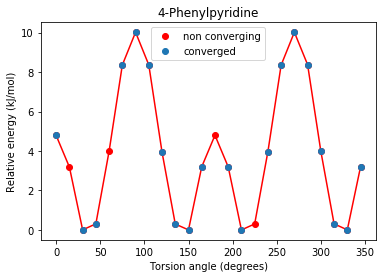

In [133]:
# remove 
phephyr_opt = phephyr.remove_nonoptimized()
plt.plot(test.angles, phephyr.qm_energy, 'o', color='red', label='non converging')
plt.plot(test.angles, phephyr.qm_energy, color='red');
plt.plot(phephyr_opt.angles, phephyr_opt.qm_energy, 'o', label='converged');
plt.legend()
plt.title('4-Phenylpyridine')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyr_scan.png');

In [26]:
phephyrF = parse_psi4_out('phepyrF/', '4phepyrF.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/0/phepyrF_3_9_10_5_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/15/phepyrF_3_9_10_5_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/15/phepyrF_3_9_10_5_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/30/phepyrF_3_9_10_5_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/45/phepyrF_3_9_10_5_45.out WARNI

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/15/phepyrF_3_9_10_5_15.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/60/phepyrF_3_9_10_5_60.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/75/phepyrF_3_9_10_5_75.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/90/phepyrF_3_9_10_5_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/105/phepyrF_3_9_10_5_105.out WAR

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/180/phepyrF_3_9_10_5_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/210/phepyrF_3_9_10_5_210.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/225/phepyrF_3_9_10_5_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/240/phepyrF_3_9_10_5_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrF/3_9_10_5/255/phepyrF_3_9_10_5_255.o

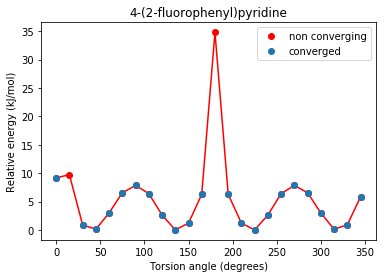

In [131]:
# remove 
phephyrF_opt = phephyrF.remove_nonoptimized()
plt.plot(phephyrF.angles, phephyrF.qm_energy, 'o', color='red', label='non converging')
plt.plot(phephyrF.angles, phephyrF.qm_energy, color='red');
plt.plot(phephyrF_opt.angles, phephyrF_opt.qm_energy, 'o', label='converged');
plt.legend()
plt.title('4-(2-fluorophenyl)pyridine')
plt.xlabel('Torsion angle (degrees)')
#plt.ylim(0, 10)
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrF_scan.png');

In [134]:
phephyrFOH_anion = parse_psi4_out('phepyrFOH_anion//', '4phepyrFOH_anion.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/0/phepyrFOH_anion_1_8_9_3_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/15/phepyrFOH_anion_1_8_9_3_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/30/phepyrFOH_anion_1_8_9_3_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/45/phepyrFOH_anion_1_8_9_3_45.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phep

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/45/phepyrFOH_anion_1_8_9_3_45.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/60/phepyrFOH_anion_1_8_9_3_60.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/75/phepyrFOH_anion_1_8_9_3_75.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/60/phepyrFOH_anion_1_8_9_3_60.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/75/phepyrFOH_anion_1_8_9_3_75.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/90/phepyrFOH_anion_1_8_9_3_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/75/phepyrFOH_anion_1_8_9_3_75.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/105/phepyrFOH_anion_1_8_9_3_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/105/phepyrFOH_anion_1_8_9_3_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/120/phepyrFOH_anion_1_8_9_3_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/105/phepyrFOH_anion_1_8_9_3_105.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/120/phepyrFOH_anion_1_8_9_3_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/135/phepyrFOH_anion_1_8_9_3_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/120/phepyrFOH_anion_1_8_9_3_120.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/135/phepyrFOH_anion_1_8_9_3_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/150/phepyrFOH_anion_1_8_9_3_150.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/165/phepyrFOH_anion_1_8_9_3_165.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/135/phepyrFOH_anion_1_8_9_3_135.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/180/phepyrFOH_anion_1_8_9_3_180.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/180/phepyrFOH_anion_1_8_9_3_180.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/195/phepyrFOH_anion_1_8_9_3_195.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/180/phepyrFOH_anion_1_8_9_3_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/210/phepyrFOH_anion_1_8_9_3_210.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/225/phepyrFOH_anion_1_8_9_3_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/240/phepyrFOH_anion_1_8_9_3_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/bipheny

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/255/phepyrFOH_anion_1_8_9_3_255.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/285/phepyrFOH_anion_1_8_9_3_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/285/phepyrFOH_anion_1_8_9_3_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/300/phepyrFOH_anion_1_8_9_3_300.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/285/phepyrFOH_anion_1_8_9_3_285.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/315/phepyrFOH_anion_1_8_9_3_315.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/330/phepyrFOH_anion_1_8_9_3_330.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/345/phepyrFOH_anion_1_8_9_3_345.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/bipheny

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_anion//1_8_9_3/345/phepyrFOH_anion_1_8_9_3_345.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


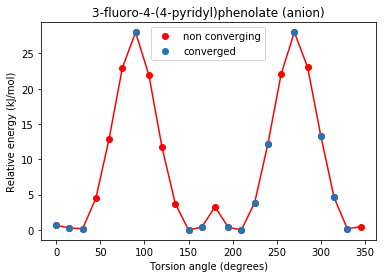

In [135]:
# remove 
phephyrFOH_anion_opt = phephyrFOH_anion.remove_nonoptimized()
plt.plot(phephyrFOH_anion.angles, phephyrFOH_anion.qm_energy, 'o', color='red', label='non converging')
plt.plot(phephyrFOH_anion.angles, phephyrFOH_anion.qm_energy, color='red');
plt.plot(phephyrFOH_anion_opt.angles, phephyrFOH_anion_opt.qm_energy, 'o', label='converged');
plt.legend()
plt.title('3-fluoro-4-(4-pyridyl)phenolate (anion)')
plt.xlabel('Torsion angle (degrees)')
#plt.ylim(0, 20)
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrFOH_anion_scan.png');


In [136]:
phephyrFOH_cation = parse_psi4_out('phepyrFOH_cation/', '4phepyrFOH_cation.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/0/phepyrFOH_cation_1_8_9_3_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/15/phepyrFOH_cation_1_8_9_3_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/30/phepyrFOH_cation_1_8_9_3_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/45/phepyrFOH_cation_1_8_9_3_45.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/p

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/60/phepyrFOH_cation_1_8_9_3_60.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/90/phepyrFOH_cation_1_8_9_3_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/105/phepyrFOH_cation_1_8_9_3_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/105/phepyrFOH_cation_1_8_9_3_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphen

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/105/phepyrFOH_cation_1_8_9_3_105.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/135/phepyrFOH_cation_1_8_9_3_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/120/phepyrFOH_cation_1_8_9_3_120.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/150/phepyrFOH_cation_1_8_9_3_150.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/165/phepyrFOH_cation_1_8_9_3_165.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/180/phepyrFOH_cation_1_8_9_3_180.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biph

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/180/phepyrFOH_cation_1_8_9_3_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/225/phepyrFOH_cation_1_8_9_3_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/240/phepyrFOH_cation_1_8_9_3_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/255/phepyrFOH_cation_1_8_9_3_255.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/240/phepyrFOH_cation_1_8_9_3_240.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/270/phepyrFOH_cation_1_8_9_3_270.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/285/phepyrFOH_cation_1_8_9_3_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/255/phepyrFOH_cation_1_8_9_3_255.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/300/phepyrFOH_cation_1_8_9_3_300.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/285/phepyrFOH_cation_1_8_9_3_285.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/315/phepyrFOH_cation_1_8_9_3_315.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/300/phepyrFOH_cation_1_8_9_3_300.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/330/phepyrFOH_cation_1_8_9_3_330.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/1_8_9_3/345/phepyrFOH_cation_1_8_9_3_345.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/0/phepyrFOH_cation_2_10_13_23_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/bi

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/45/phepyrFOH_cation_2_10_13_23_45.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/75/phepyrFOH_cation_2_10_13_23_75.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/90/phepyrFOH_cation_2_10_13_23_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/105/phepyrFOH_cation_2_10_13_23_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/tors

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/135/phepyrFOH_cation_2_10_13_23_135.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/150/phepyrFOH_cation_2_10_13_23_150.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/165/phepyrFOH_cation_2_10_13_23_165.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/150/phepyrFOH_cation_2_10_13_23_150.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/180/phepyrFOH_cation_2_10_13_23_180.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/195/phepyrFOH_cation_2_10_13_23_195.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/180/phepyrFOH_cation_2_10_13_23_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/210/phepyrFOH_cation_2_10_13_23_210.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/225/phepyrFOH_cation_2_10_13_23_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/240/phepyrFOH_cation_2_10_13_23_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/315/phepyrFOH_cation_2_10_13_23_315.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_cation/2_10_13_23/345/phepyrFOH_cation_2_10_13_23_345.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


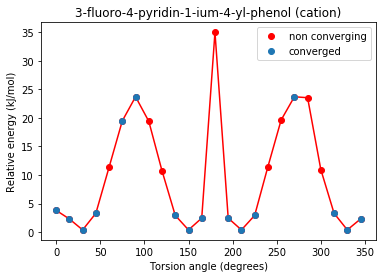

In [137]:
# remove 
phephyrFOH_cation_opt = phephyrFOH_cation.remove_nonoptimized()
plt.plot(phephyrFOH_cation.angles[:24], phephyrFOH_cation.qm_energy[:24], 'o', color='red', label='non converging')
plt.plot(phephyrFOH_cation.angles[:24], phephyrFOH_cation.qm_energy[:24], color='red');
plt.plot(phephyrFOH_cation_opt.angles[:16], phephyrFOH_cation_opt.qm_energy[:16], 'o', label='converged');
plt.legend()
plt.title('3-fluoro-4-pyridin-1-ium-4-yl-phenol (cation)')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrFOH_cation_scan.png');

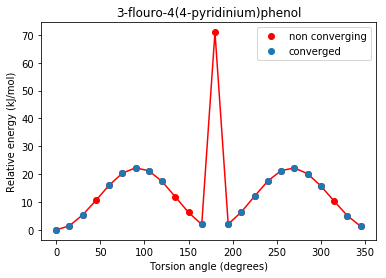

In [86]:
# remove 
phephyrFOH_cation_opt = phephyrFOH_cation.remove_nonoptimized()
plt.plot(phephyrFOH_cation.angles[24:], phephyrFOH_cation.qm_energy[24:], 'o', color='red', label='non converging')
plt.plot(phephyrFOH_cation.angles[24:], phephyrFOH_cation.qm_energy[24:], color='red');
plt.plot(phephyrFOH_cation_opt.angles[16:], phephyrFOH_cation_opt.qm_energy[16:], 'o', label='converged');
plt.legend()
plt.title('3-fluoro-4-(4-pyridyl)phenol')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrFOH_cation_scan_hydroxyl.png');

In [138]:
phephyrFOH_nuetral = parse_psi4_out('phepyrFOH_neutral/', '4phepyrFOH_neutral.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/0/phepyrFOH_neutral_1_8_9_3_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/15/phepyrFOH_neutral_1_8_9_3_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/15/phepyrFOH_neutral_1_8_9_3_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/30/phepyrFOH_neutral_1_8_9_3_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biph

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/15/phepyrFOH_neutral_1_8_9_3_15.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/30/phepyrFOH_neutral_1_8_9_3_30.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_e

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/90/phepyrFOH_neutral_1_8_9_3_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/105/phepyrFOH_neutral_1_8_9_3_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/75/phepyrFOH_neutral_1_8_9_3_75.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/90/phepyrFOH_neutral_1_8_9_3_90.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/120/phepyrFOH_neutral_1_8_9_3_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/120/phepyrFOH_neutral_1_8_9_3_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/135/phepyrFOH_neutral_1_8_9_3_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_driv

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/120/phepyrFOH_neutral_1_8_9_3_120.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/165/phepyrFOH_neutral_1_8_9_3_165.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/180/phepyrFOH_neutral_1_8_9_3_180.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/195/phepyrFOH_neutral_1_8_9_3_195.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/180/phepyrFOH_neutral_1_8_9_3_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/210/phepyrFOH_neutral_1_8_9_3_210.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/225/phepyrFOH_neutral_1_8_9_3_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/240/phepyrFOH_neutral_1_8_9_3_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_driv

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/240/phepyrFOH_neutral_1_8_9_3_240.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/255/phepyrFOH_neutral_1_8_9_3_255.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/285/phepyrFOH_neutral_1_8_9_3_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/285/phepyrFOH_neutral_1_8_9_3_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/300/phepyrFOH_neutral_1_8_9_3_300.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_driv

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/1_8_9_3/345/phepyrFOH_neutral_1_8_9_3_345.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/0/phepyrFOH_neutral_2_10_13_22_0.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsio

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/90/phepyrFOH_neutral_2_10_13_22_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/105/phepyrFOH_neutral_2_10_13_22_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/75/phepyrFOH_neutral_2_10_13_22_75.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/90/phepyrFOH_neutral_2_10_13_22_90.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/120/phepyrFOH_neutral_2_10_13_22_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/135/phepyrFOH_neutral_2_10_13_22_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/150/phepyrFOH_neutral_2_10_13_22_150.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/105/phepyrFOH_neutral_2_10_13_22_105.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/120/phepyrFOH_neutral_2_10_13_22_120.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/Chay

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/165/phepyrFOH_neutral_2_10_13_22_165.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/195/phepyrFOH_neutral_2_10_13_22_195.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/210/phepyrFOH_neutral_2_10_13_22_210.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/165/phepyrFOH_neutral_2_10_13_22_165.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/180/phepyrFOH_neutral_2_10_13_22_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/Chay

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/225/phepyrFOH_neutral_2_10_13_22_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/270/phepyrFOH_neutral_2_10_13_22_270.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/240/phepyrFOH_neutral_2_10_13_22_240.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/255/phepyrFOH_neutral_2_10_13_22_255.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/285/phepyrFOH_neutral_2_10_13_22_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/300/phepyrFOH_neutral_2_10_13_22_300.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/285/phepyrFOH_neutral_2_10_13_22_285.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/315/phepyrFOH_neutral_2_10_13_22_315.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/330/phepyrFOH_neutral_2_10_13_22_330.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/315/phepyrFOH_neutral_2_10_13_22_315.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_neutral/2_10_13_22/330/phepyrFOH_neutral_2_10_13_22_330.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/Chay

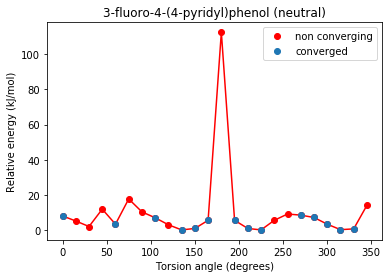

In [139]:
# remove 
phephyrFOH_nuetral_opt = phephyrFOH_nuetral.remove_nonoptimized()
plt.plot(phephyrFOH_nuetral.angles[:24], phephyrFOH_nuetral.qm_energy[:24], 'o', color='red', label='non converging')
plt.plot(phephyrFOH_nuetral.angles[:24], phephyrFOH_nuetral.qm_energy[:24], color='red');
plt.plot(phephyrFOH_nuetral_opt.angles[:14], phephyrFOH_nuetral_opt.qm_energy[:14], 'o', label='converged');
plt.legend()
plt.title('3-fluoro-4-(4-pyridyl)phenol (neutral)')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrFOH_neutral_scan.png');

In [140]:
phephyrFOH_zwitter = parse_psi4_out('phepyrFOH_zwitterion/', '4phepyrFOH_zwitterion.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/0/phepyrFOH_zwitterion_1_8_9_3_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/15/phepyrFOH_zwitterion_1_8_9_3_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/30/phepyrFOH_zwitterion_1_8_9_3_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/45/phepyrFOH_zwitterion_1_8_9_3_45.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/45/phepyrFOH_zwitterion_1_8_9_3_45.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/75/phepyrFOH_zwitterion_1_8_9_3_75.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/60/phepyrFOH_zwitterion_1_8_9_3_60.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/90/phepyrFOH_zwitterion_1_8_9_3_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/75/phepyrFOH_zwitterion_1_8_9_3_75.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/105/phepyrFOH_zwitterion_1_8_9_3_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/90/phepyrFOH_zwitterion_1_8_9_3_90.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/105/phepyrFOH_zwitterion_1_8_9_3_105.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/120/phepyrFOH_zwitterion_1_8_9_3_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/135/phepyrFOH_zwitterion_1_8_9_3_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/120/phepyrFOH_zwitterion_1_8_9_3_120.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/150/phepyrFOH_zwitterion_1_8_9_3_150.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/135/phepyrFOH_zwitterion_1_8_9_3_135.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/165/phepyrFOH_zwitterion_1_8_9_3_165.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/180/phepyrFOH_zwitterion_1_8_9_3_180.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/195/phepyrFOH_zwitterion_1_8_9_3_195.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_exa

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/180/phepyrFOH_zwitterion_1_8_9_3_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/195/phepyrFOH_zwitterion_1_8_9_3_195.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/225/phepyrFOH_zwitterion_1_8_9_3_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/240/phepyrFOH_zwitterion_1_8_9_3_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/225/phepyrFOH_zwitterion_1_8_9_3_225.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/255/phepyrFOH_zwitterion_1_8_9_3_255.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/240/phepyrFOH_zwitterion_1_8_9_3_240.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/270/phepyrFOH_zwitterion_1_8_9_3_270.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/255/phepyrFOH_zwitterion_1_8_9_3_255.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/285/phepyrFOH_zwitterion_1_8_9_3_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/270/phepyrFOH_zwitterion_1_8_9_3_270.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/300/phepyrFOH_zwitterion_1_8_9_3_300.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/285/phepyrFOH_zwitterion_1_8_9_3_285.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/315/phepyrFOH_zwitterion_1_8_9_3_315.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/300/phepyrFOH_zwitterion_1_8_9_3_300.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/330/phepyrFOH_zwitterion_1_8_9_3_330.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/315/phepyrFOH_zwitterion_1_8_9_3_315.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrFOH_zwitterion/1_8_9_3/345/phepyrFOH_zwitterion_1_8_9_3_345.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


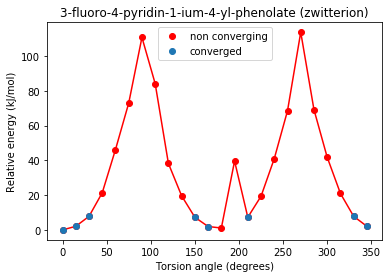

In [141]:
# remove 
phephyrFOH_zwitter_opt = phephyrFOH_zwitter.remove_nonoptimized()
plt.plot(phephyrFOH_zwitter.angles, phephyrFOH_zwitter.qm_energy, 'o', color='red', label='non converging')
plt.plot(phephyrFOH_zwitter.angles, phephyrFOH_zwitter.qm_energy, color='red');
plt.plot(phephyrFOH_zwitter_opt.angles, phephyrFOH_zwitter_opt.qm_energy, 'o', label='converged');
plt.legend()
plt.title('3-fluoro-4-pyridin-1-ium-4-yl-phenolate (zwitterion)')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrFOH_zwitter_scan.png');

In [142]:
phephyrOH_zwitter = parse_psi4_out('phepyrOH_zwitterion/', '4phepyrOH_zwitterion.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/0/phepyrOH_zwitterion_1_9_10_5_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/15/phepyrOH_zwitterion_1_9_10_5_15.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/30/phepyrOH_zwitterion_1_9_10_5_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/45/phepyrOH_zwitterion_1_9_10_5_45.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/45/phepyrOH_zwitterion_1_9_10_5_45.out WARNING] File terminated before end of last SCF! Last density err: 1.01828e-08
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/60/phepyrOH_zwitterion_1_9_10_5_60.out

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/45/phepyrOH_zwitterion_1_9_10_5_45.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/90/phepyrOH_zwitterion_1_9_10_5_90.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/60/phepyrOH_zwitterion_1_9_10_5_60.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/75/phepyrOH_zwitterion_1_9_10_5_75.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/105/phepyrOH_zwitterion_1_9_10_5_105.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/120/phepyrOH_zwitterion_1_9_10_5_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/105/phepyrOH_zwitterion_1_9_10_5_105.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/135/phepyrOH_zwitterion_1_9_10_5_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/120/phepyrOH_zwitterion_1_9_10_5_120.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/150/phepyrOH_zwitterion_1_9_10_5_150.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/165/phepyrOH_zwitterion_1_9_10_5_165.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/180/phepyrOH_zwitterion_1_9_10_5_180.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_exa

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/180/phepyrOH_zwitterion_1_9_10_5_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/210/phepyrOH_zwitterion_1_9_10_5_210.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/225/phepyrOH_zwitterion_1_9_10_5_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/240/phepyrOH_zwitterion_1_9_10_5_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/225/phepyrOH_zwitterion_1_9_10_5_225.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/255/phepyrOH_zwitterion_1_9_10_5_255.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/240/phepyrOH_zwitterion_1_9_10_5_240.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/270/phepyrOH_zwitterion_1_9_10_5_270.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/255/phepyrOH_zwitterion_1_9_10_5_255.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/285/phepyrOH_zwitterion_1_9_10_5_285.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/300/phepyrOH_zwitterion_1_9_10_5_300.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/285/phepyrOH_zwitterion_1_9_10_5_285.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/315/phepyrOH_zwitterion_1_9_10_5_315.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/300/phepyrOH_zwitterion_1_9_10_5_300.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/330/phepyrOH_zwitterion_1_9_10_5_330.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/315/phepyrOH_zwitterion_1_9_10_5_315.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_zwitterion/1_9_10_5/345/phepyrOH_zwitterion_1_9_10_5_345.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


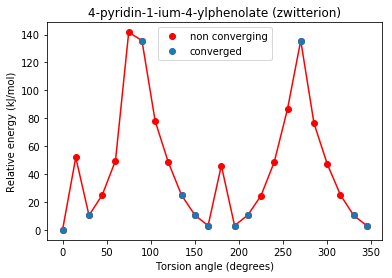

In [143]:
# remove 
phephyrOH_zwitter_opt = phephyrOH_zwitter.remove_nonoptimized()
plt.plot(phephyrOH_zwitter.angles, phephyrOH_zwitter.qm_energy, 'o', color='red', label='non converging')
plt.plot(phephyrOH_zwitter.angles, phephyrOH_zwitter.qm_energy, color='red');
plt.plot(phephyrOH_zwitter_opt.angles, phephyrOH_zwitter_opt.qm_energy, 'o', label='converged');
plt.legend()
plt.title('4-pyridin-1-ium-4-ylphenolate (zwitterion)')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrOH_zwitter_scan.png');

In [144]:
phephyrOH_cation = parse_psi4_out('phepyrOH_cation/', '4phepyrOH_cation.mol2')

/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/1_9_10_5/0/phepyrOH_cation_1_9_10_5_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/1_9_10_5/15/phepyrOH_cation_1_9_10_5_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/1_9_10_5/30/phepyrOH_cation_1_9_10_5_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phe

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/1_9_10_5/255/phepyrOH_cation_1_9_10_5_255.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/1_9_10_5/300/phepyrOH_cation_1_9_10_5_300.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/1_9_10_5/315/phepyrOH_cation_1_9_10_5_315.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/1_9_10_5/330/phepyrOH_cation_1_9_10_5_330.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biph

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/75/phepyrOH_cation_3_11_13_23_75.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/120/phepyrOH_cation_3_11_13_23_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/135/phepyrOH_cation_3_11_13_23_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/150/phepyrOH_cation_3_11_13_23_150.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsio

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/180/phepyrOH_cation_3_11_13_23_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/210/phepyrOH_cation_3_11_13_23_210.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/240/phepyrOH_cation_3_11_13_23_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/255/phepyrOH_cation_3_11_13_23_255.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_cation/3_11_13_23/270/phepyrOH_cation_3_11_13_23_270.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsio

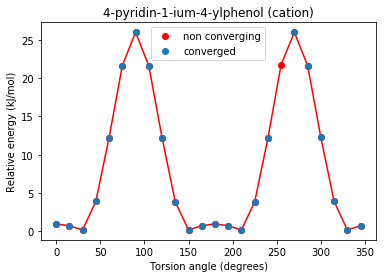

In [145]:
# remove 
phephyrOH_cation_opt = phephyrOH_cation.remove_nonoptimized()
plt.plot(phephyrOH_cation.angles[:24], phephyrOH_cation.qm_energy[:24], 'o', color='red', label='non converging')
plt.plot(phephyrOH_cation.angles[:24], phephyrOH_cation.qm_energy[:24], color='red');
plt.plot(phephyrOH_cation_opt.angles[:23], phephyrOH_cation_opt.qm_energy[:23], 'o', label='converged');
plt.legend()
plt.title('4-pyridin-1-ium-4-ylphenol (cation)')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrOH_cation_scan.png');

In [146]:
phephyrOH_neutral = parse_psi4_out('phepyrOH_neutral/', '4phepyrOH_neutral.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/0/phepyrOH_neutral_1_9_10_5_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/15/phepyrOH_neutral_1_9_10_5_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/30/phepyrOH_neutral_1_9_10_5_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/45/phepyrOH_neutral_1_9_10_5_45.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/60/phepyrOH_neutral_1_9_10_5_60.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biph

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/180/phepyrOH_neutral_1_9_10_5_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/225/phepyrOH_neutral_1_9_10_5_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/240/phepyrOH_neutral_1_9_10_5_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/1_9_10_5/255/phepyrOH_neutral_1_9_10_5_255.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_driv

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/3_11_13_22/180/phepyrOH_neutral_3_11_13_22_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/3_11_13_22/210/phepyrOH_neutral_3_11_13_22_210.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/3_11_13_22/225/phepyrOH_neutral_3_11_13_22_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_neutral/3_11_13_22/240/phepyrOH_neutral_3_11_13_22_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/

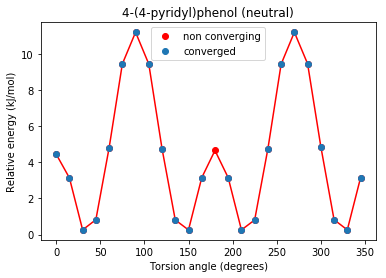

In [147]:
phephyrOH_neutral_opt = phephyrOH_neutral.remove_nonoptimized()
plt.plot(phephyrOH_neutral.angles[:24], phephyrOH_neutral.qm_energy[:24], 'o', color='red', label='non converging')
plt.plot(phephyrOH_neutral.angles[:24], phephyrOH_neutral.qm_energy[:24], color='red');
plt.plot(phephyrOH_neutral_opt.angles[:23], phephyrOH_neutral_opt.qm_energy[:23], 'o', label='converged');
plt.legend()
plt.title('4-(4-pyridyl)phenol (neutral)')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrOH_neutral_scan.png');

In [148]:
phephyrOH_anion = parse_psi4_out('phepyrOH_anion/', '4phepyrOH_anion.mol2')

[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/0/phepyrOH_anion_1_9_10_5_0.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/15/phepyrOH_anion_1_9_10_5_15.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/chayastern/anaconda/lib/python3.6/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/30/phepyrOH_anion_1_9_10_5_30.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/45/phepyrOH_anion_1_9_10_5_45.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/60/phepyrOH_anion_1_9_10_5_60.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrO

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/75/phepyrOH_anion_1_9_10_5_75.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/120/phepyrOH_anion_1_9_10_5_120.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/135/phepyrOH_anion_1_9_10_5_135.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/150/phepyrOH_anion_1_9_10_5_150.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/p

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/180/phepyrOH_anion_1_9_10_5_180.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/225/phepyrOH_anion_1_9_10_5_225.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/240/phepyrOH_anion_1_9_10_5_240.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/255/phepyrOH_anion_1_9_10_5_255.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/p

/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/255/phepyrOH_anion_1_9_10_5_255.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/285/phepyrOH_anion_1_9_10_5_285.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/330/phepyrOH_anion_1_9_10_5_330.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/345/phepyrOH_anion_1_9_10_5_345.out WARNING] In logfileparser.py, line 472, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/300/phepyrOH_anion_1_9_10_5_300.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))
/Users/chayastern/anaconda/lib/python3.6/site-packages/torsionfit-0+untagged.607.g735d503.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:217: UserWarning: Warning: Optimizer failed for /Users/chayastern/src/ChayaSt/torsionfit_examples/torsion_drive/biphenyl/phepyrOH_anion/1_9_10_5/315/phepyrOH_anion_1_9_10_5_315.out
  warnings.warn("Warning: Optimizer failed for {}".format(f))


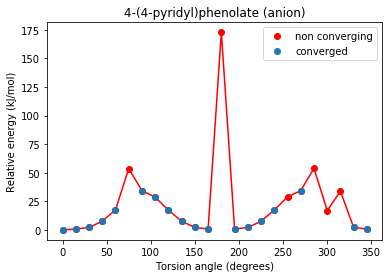

In [149]:
phephyrOH_anion_opt = phephyrOH_anion.remove_nonoptimized()
plt.plot(phephyrOH_anion.angles, phephyrOH_anion.qm_energy, 'o', color='red', label='non converging')
plt.plot(phephyrOH_anion.angles, phephyrOH_anion.qm_energy, color='red');
plt.plot(phephyrOH_anion_opt.angles, phephyrOH_anion_opt.qm_energy, 'o', label='converged');
plt.legend()
plt.title('4-(4-pyridyl)phenolate (anion)')
plt.xlabel('Torsion angle (degrees)')
plt.ylabel('Relative energy (kJ/mol)')
plt.savefig('phepyrOH_anion_scan.png');